In [45]:
from google.colab import files
uploaded = files.upload()

Saving India_Confirmed_Deaths_21.csv to India_Confirmed_Deaths_21.csv


In [46]:
import pandas as pd
df = pd.read_csv("India_Deathsed_Deaths_21.csv")
df.head()

,Date,Deaths
0,1/1/21,149474
1,1/2/21,149435
2,1/3/21,149649
3,1/4/21,149850
4,1/5/21,150114


In [47]:
Deaths_cases = df['Deaths']

In [48]:
data = df.filter(['Deaths'])

In [49]:
dataset = data.values

In [50]:
import math
training_data_len = math.ceil(len(dataset) * 0.7)
training_data_len

189

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [52]:
scaled_data

array([[1.30899717e-04],
       [0.00000000e+00],
       [7.18270244e-04],
       [1.39290725e-03],
       [2.27899764e-03],
       [3.02411911e-03],
       [3.80951742e-03],
       [3.80951742e-03],
       [5.24941431e-03],
       [5.78979519e-03],
       [6.35031449e-03],
       [7.02830790e-03],
       [7.69287570e-03],
       [8.33394867e-03],
       [8.92131920e-03],
       [9.52882815e-03],
       [1.00155066e-02],
       [1.04753338e-02],
       [1.10190711e-02],
       [1.15258879e-02],
       [1.20729816e-02],
       [1.25831549e-02],
       [1.31033974e-02],
       [1.35430861e-02],
       [1.39357853e-02],
       [1.43956125e-02],
       [1.48084501e-02],
       [1.53555438e-02],
       [1.58153710e-02],
       [1.62416342e-02],
       [1.66376897e-02],
       [1.69531916e-02],
       [1.73223959e-02],
       [1.76815311e-02],
       [1.80842994e-02],
       [1.84031577e-02],
       [1.86649571e-02],
       [1.89468950e-02],
       [1.92086944e-02],
       [1.95241963e-02],


In [53]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.0001309 , 0.        , 0.00071827, 0.00139291, 0.002279  ,
       0.00302412, 0.00380952, 0.00380952, 0.00524941, 0.0057898 ])]
[0.006350314494962039]



In [54]:
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)

In [55]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(179, 10, 1)

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [57]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
179/179 [==============================] - 6s 14ms/step - loss: 0.0055
Epoch 2/50
179/179 [==============================] - 2s 13ms/step - loss: 7.4165e-04
Epoch 3/50
179/179 [==============================] - 2s 13ms/step - loss: 7.2882e-04
Epoch 4/50
179/179 [==============================] - 2s 14ms/step - loss: 8.8523e-05
Epoch 5/50
179/179 [==============================] - 2s 13ms/step - loss: 1.6695e-04
Epoch 6/50
179/179 [==============================] - 2s 13ms/step - loss: 1.3808e-04
Epoch 7/50
179/179 [==============================] - 2s 14ms/step - loss: 1.2149e-04
Epoch 8/50
179/179 [==============================] - 3s 14ms/step - loss: 3.9756e-04
Epoch 9/50
179/179 [==============================] - 2s 14ms/step - loss: 4.2499e-04
Epoch 10/50
179/179 [==============================] - 2s 14ms/step - loss: 1.7715e-04
Epoch 11/50
179/179 [==============================] - 2s 14ms/step - loss: 1.8291e-04
Epoch 12/50
179/179 [==============================] - 2

In [59]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [60]:
len(test_data)

91

In [61]:
x_test = np.array(x_test)

In [62]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [63]:
x_test

array([[[0.83580812],
        [0.83918131],
        [0.84204432],
        [0.84452134],
        [0.84772671],
        [0.85015339],
        [0.85200948],
        [0.85513093],
        [0.85787311],
        [0.8609308 ]],

       [[0.83918131],
        [0.84204432],
        [0.84452134],
        [0.84772671],
        [0.85015339],
        [0.85200948],
        [0.85513093],
        [0.85787311],
        [0.8609308 ],
        [0.86497862]],

       [[0.84204432],
        [0.84452134],
        [0.84772671],
        [0.85015339],
        [0.85200948],
        [0.85513093],
        [0.85787311],
        [0.8609308 ],
        [0.86497862],
        [0.8679826 ]],

       [[0.84452134],
        [0.84772671],
        [0.85015339],
        [0.85200948],
        [0.85513093],
        [0.85787311],
        [0.8609308 ],
        [0.86497862],
        [0.8679826 ],
        [0.87041264]],

       [[0.84772671],
        [0.85015339],
        [0.85200948],
        [0.85513093],
        [0.85787311],
  

In [64]:
len(x_test)

81

In [65]:
len(x_train)

179

In [66]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [67]:
predictions

array([[400343.25],
       [400972.9 ],
       [401610.25],
       [402230.06],
       [402975.97],
       [403699.75],
       [404373.28],
       [404992.06],
       [405557.03],
       [406075.53],
       [406551.78],
       [406974.06],
       [407757.12],
       [408556.97],
       [409271.25],
       [409861.5 ],
       [410448.5 ],
       [410987.1 ],
       [411475.5 ],
       [411945.2 ],
       [412406.  ],
       [412854.8 ],
       [413231.9 ],
       [413608.47],
       [413970.62],
       [414325.44],
       [414668.94],
       [415016.06],
       [415358.88],
       [415708.75],
       [416054.62],
       [416391.4 ],
       [416710.06],
       [417025.44],
       [417342.12],
       [417670.78],
       [417998.25],
       [418324.44],
       [418642.38],
       [418950.66],
       [419253.47],
       [419562.28],
       [419880.75],
       [420188.56],
       [420486.38],
       [420772.2 ],
       [421046.03],
       [421339.53],
       [421654.12],
       [421975.06],


In [68]:
len(predictions)

81

In [69]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

13547.280864197532

In [70]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted Cases'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


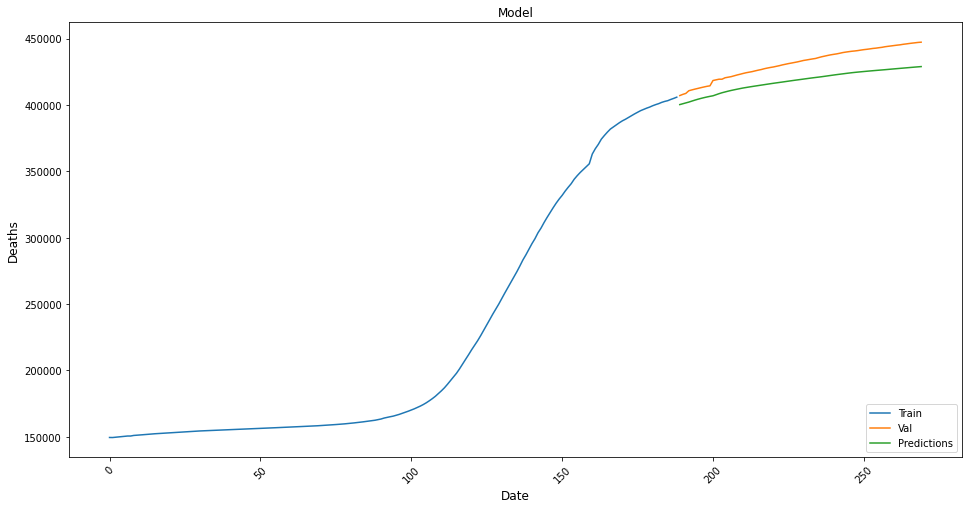

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Deaths', fontsize=12)
plt.plot(train['Deaths'])
plt.plot(valid[['Deaths', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

In [72]:
valid

,Deaths,Predicted Cases
189,407145,400343.25000
190,408040,400972.90625
191,408764,401610.25000
192,410784,402230.06250
193,411406,402975.96875
...,...,...
265,446368,428224.06250
266,446658,428419.53125
267,446918,428613.09375
268,447194,428799.03125


In [73]:
len(valid)

81

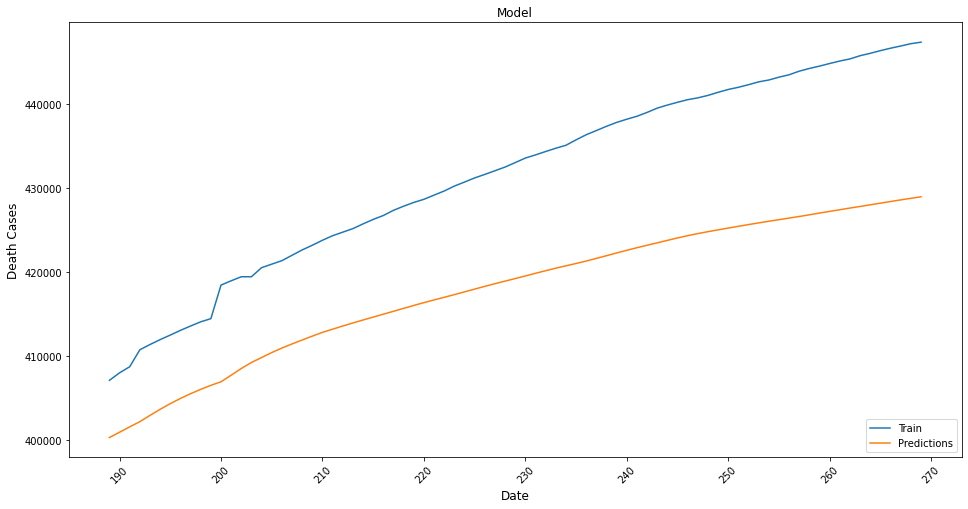

In [75]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Death Cases', fontsize=12)
plt.plot(valid)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

In [76]:
from sklearn.metrics import r2_score
score = r2_score(valid['Deaths'], valid['Predicted Cases'])
print(score)

-0.5096203958411116
